# Predicting Flood Probabilities

Various different factors can affect a location's probability of flooding. For this notebook, we will be performing an analysis of a dataset containing locations and their physical properties. Our goal is to create a machine learning model that can predict the probability of that location flooding. First, let's load in our data and take a look at our features:

In [1]:
# Load in libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import datasets
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

print(train.head())
print(train.describe().apply(lambda s: s.apply('{0:.5f}'.format)))

# Create concatenated dataset for analysis
td = pd.concat([train, test], ignore_index = True, sort = False)

   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   ...  DrainageSystems  CoastalVulner

Looking at the above output, we have a fairly simple dataset. With the exception of `id` and `FloodProbability`, all of the features are continuous, with a range from 0 to 16-19 depending on the feature. This is fantastic for our analysis, since all features are on relatively the same scale as one another. Since there are no missing values, we can jump right into the EDA and Feature Engineering phase.

# Exploratory Data Analysis and Feature Engineering

Let's begin by examining the histograms of each continuous feature, just to get a look at their distributions:

<class 'list'>


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

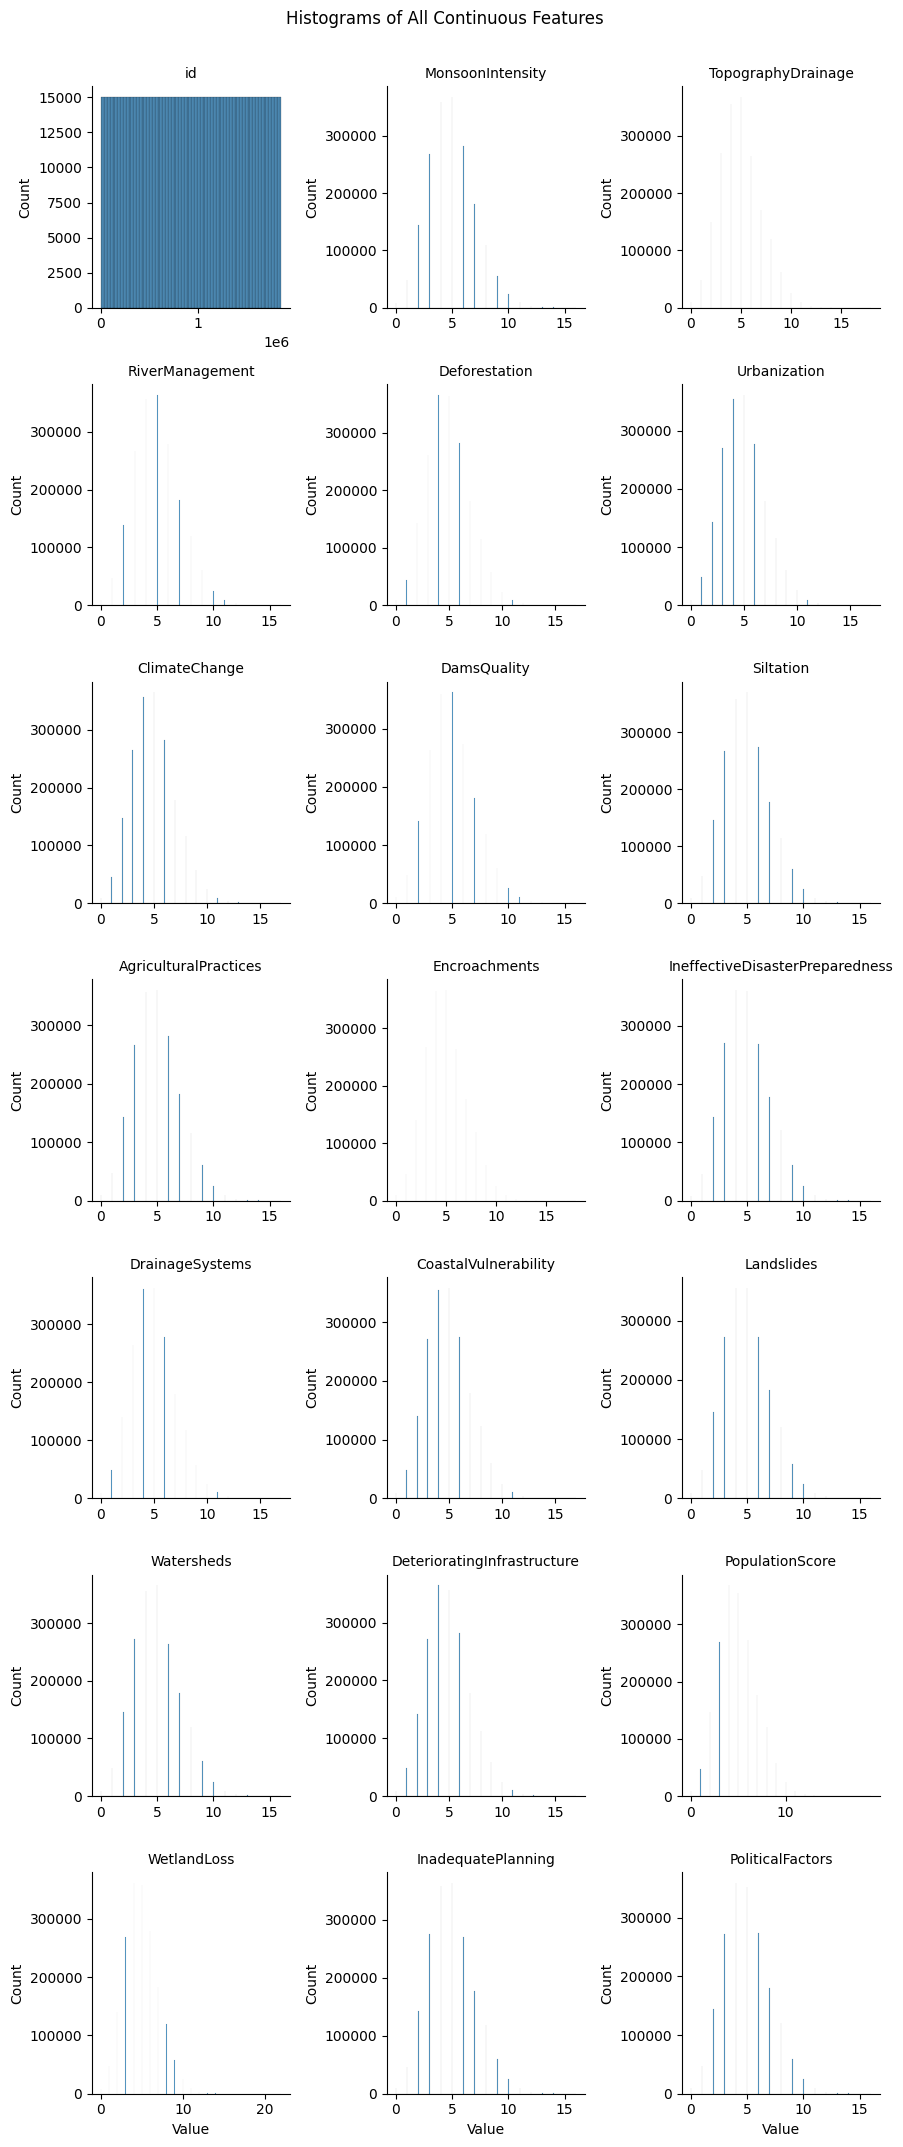

In [2]:
# Suppresses warnings
pd.option_context('mode.use_inf_as_na', True)

# Initialize all continuous features in a list
continuous = list(td.columns)
print(type(continuous))

# Plot histograms of all continuous features
td_melted = td.melt(id_vars=['FloodProbability'], value_vars = continuous, var_name = 'Feature', value_name = 'Value')
g = sns.FacetGrid(td_melted, col="Feature", col_wrap=3, height=3, sharex=False, sharey=False)
g = g.map(sns.histplot, 'Value')
g.set_titles("{col_name}")
g.fig.tight_layout()
g.fig.suptitle('Histograms of All Continuous Features', y=1.02)
plt.show()